In [1]:
#Allison Tumas

#First we will import all of the libraries needed for this project
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read in the Twitter data for analysis
td = pd.read_csv('twitter_human_bots_dataset.csv')

#Preview the Data
td.head(10)

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
5,5,2016-11-21 22:50:30,True,False,لا إله إلا الله . فعل التنبيهات 🌷🎖عادل ...حساب...,237,27394,542,False,800833795234611200,ar,مكة المكرمة,NaN,http://pbs.twimg.com/profile_images/1273524501...,Ayat_140,11513,False,8.428,1366,bot
6,6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,en,Los Angeles,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1275104892...,carrieanninaba,14535,True,3.581,4059,human
7,7,2012-09-07 20:01:33,False,False,Internationally-acclaimed Egyptian Singer.,756,6909959,40,False,809500704,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1243989369...,sherine,1223,True,0.421,2902,human
8,8,2012-12-16 11:43:24,True,False,NaN,64,24,0,False,1015021614,NaN,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6114933021...,cordensmaureen,277,False,0.099,2802,human
9,9,2012-02-14 15:33:48,False,False,Man Utd fan. mostly here for football. Takes p...,36384,2130,3363,True,492306486,en,United Kingdom,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1211318786...,GhamGraham,63376,False,20.391,3108,human


In [3]:
#Check your data types
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37438 non-null  int64  
 1   created_at                    37438 non-null  object 
 2   default_profile               37438 non-null  bool   
 3   default_profile_image         37438 non-null  bool   
 4   description                   30182 non-null  object 
 5   favourites_count              37438 non-null  int64  
 6   followers_count               37438 non-null  int64  
 7   friends_count                 37438 non-null  int64  
 8   geo_enabled                   37438 non-null  bool   
 9   id                            37438 non-null  int64  
 10  lang                          29481 non-null  object 
 11  location                      37435 non-null  object 
 12  profile_background_image_url  32939 non-null  object 
 13  p

In [4]:
#In this instance we will pay special attention the the bool objects because we know /
#that they will need to be transformed for categorical encoding later in the project

human    0.668118
bot      0.331882
Name: account_type, dtype: float64
Bot accounts make up 33% of the dataset.


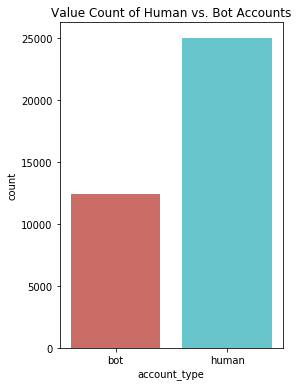

In [5]:
#Next we will do a simple visualization of the dataset to check the percentage of bot vs. human accounts in our dataset since that will be our target column
#We can see that about 1/3rd of the accounts are bot accounts
plt.figure(figsize=(4, 6))
bot = td['account_type']
sns.countplot(x=bot, data=td, palette='hls')
bot_value = td['account_type'].value_counts(normalize=True)
plt.title('Value Count of Human vs. Bot Accounts')
plt.savefig('Account_Type_Count.png')
print(bot_value)
print('Bot accounts make up 33% of the dataset.')

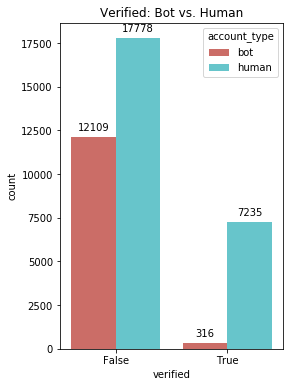

In [6]:
plt.figure(figsize=(4, 6))
plot = sns.countplot(x="verified", hue="account_type", palette='hls', data=td)
plt.title('Verified: Bot vs. Human')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('Account_Type_Verified.png')
#Less than .03 bot accounts are verified compared to nearly 3% of human accounts.

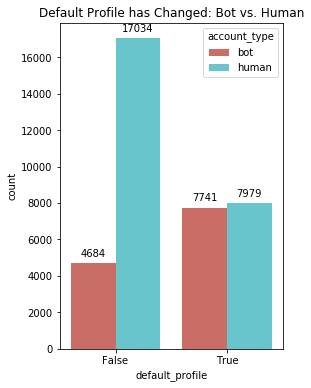

In [7]:
plt.figure(figsize=(4, 6))
plot = sns.countplot(x="default_profile", hue="account_type", palette='hls', data=td)
plt.title('Default Profile has Changed: Bot vs. Human')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('Account_Type_default_pro.png')
#78% of human accounts have changed thier default profile while only 38% of bot accounts changed their default profiles.

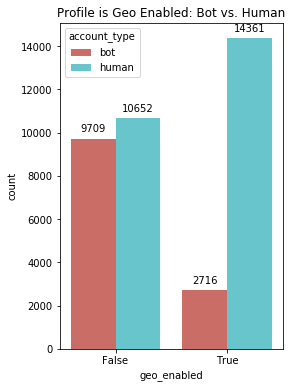

In [8]:
plt.figure(figsize=(4, 6))
plot = sns.countplot(x="geo_enabled", hue="account_type", palette='hls', data=td)
plt.title('Profile is Geo Enabled: Bot vs. Human')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('Account_Type_geo.png')
#Only 2% bot accounts are geo enabled compared to 58% of human accounts

In [9]:
####################################
'''Data Treatment: Data Cleaning'''
####################################
#First we will drop the unnamed column that is serving as an index
td = td.iloc[:,1:]

In [10]:
td.head(3)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human


In [11]:
#We will want to clean or drop any column that is type object before we apply categorical encoding.
#created at: Apply time-series clean up 
#for this it will be easiest to just work with the date 
td['created_at'] = pd.to_datetime(td['created_at'], format='%Y-%m-%d', errors='coerce')
td['created_at'].dtypes
#source: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

dtype('<M8[ns]')

In [12]:
#For the following features, we cannot apply categorical encoding because their are too many differing features in the set:
#Here we could possible use an imputer for the null columns but the missing value column is actually critical in changing this column to true or false which is more meaningful
'''change the below to bool type i.e. the account provided this information or they did not'''
#description: NaN = False
td['description'] = pd.notna(td['description'])
#lang: NaN = False
td['lang'] = pd.notna(td['lang'])
td.head(3)


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,True,4,1589,4,False,787405734442958848,True,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,True,536,860,880,False,796216118331310080,True,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,True,3307,172,594,True,875949740503859204,True,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human


In [13]:
#We can delete profile background image url and profile image url instead of applying the bool method because we know whether it was updated from the default profile and default profile image columns which are already data type bool
td = td.drop(columns=['profile_image_url', 'profile_background_image_url'])
td.head(3)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,True,4,1589,4,False,787405734442958848,True,unknown,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,True,536,860,880,False,796216118331310080,True,Estados Unidos,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,True,3307,172,594,True,875949740503859204,True,"Los Angeles, CA",SVGEGENT,1001,False,0.864,1159,human


In [28]:
#screen_name, #id, #location
td_cat = td.drop(columns=['screen_name', 'location', 'id'])
td_cat.head(3)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,True,4,1589,4,False,True,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,True,536,860,880,False,True,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,True,3307,172,594,True,True,1001,False,0.864,1159,human


In [29]:
#look for missing data
td_cat = td_cat.dropna()

In [30]:
#check to ensure the object data types have changed to bool types
td_cat.dtypes

created_at                datetime64[ns]
default_profile                     bool
default_profile_image               bool
description                         bool
favourites_count                   int64
followers_count                    int64
friends_count                      int64
geo_enabled                         bool
lang                                bool
statuses_count                     int64
verified                            bool
average_tweets_per_day           float64
account_age_days                   int64
account_type                      object
dtype: object

In [31]:
#Now that they are marked as true or false, we want to set True to an int of 1 and False to an int of 0, we can do this by multiplying the dataset by 1
td_cat[['default_profile', 'default_profile_image', 'description', 'geo_enabled', 'lang', 'verified']] *=1

In [32]:
td_cat.head(3)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,0,1,4,1589,4,0,1,11041,0,7.870,1403,bot
1,2016-11-09 05:01:30,0,0,1,536,860,880,0,1,252,0,0.183,1379,human
2,2017-06-17 05:34:27,0,0,1,3307,172,594,1,1,1001,0,0.864,1159,human


In [33]:
#Categorical Encoding
#Categorical encoding will be applied to account_type which also happens to be the target variable 
td_dum = pd.get_dummies(td_cat)
td_dum.head(3)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,statuses_count,verified,average_tweets_per_day,account_age_days,account_type_bot,account_type_human
0,2016-10-15 21:32:11,0,0,1,4,1589,4,0,1,11041,0,7.870,1403,1,0
1,2016-11-09 05:01:30,0,0,1,536,860,880,0,1,252,0,0.183,1379,0,1
2,2017-06-17 05:34:27,0,0,1,3307,172,594,1,1,1001,0,0.864,1159,0,1


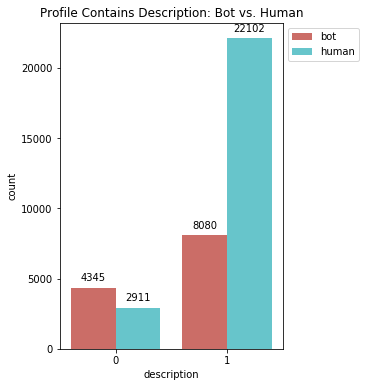

In [34]:
plt.figure(figsize=(4, 6))
plot = sns.countplot(x="description", hue="account_type_human", palette='hls', data=td_dum)
plt.title('Profile Contains Description: Bot vs. Human')
legend_labels, _= plot.get_legend_handles_labels()
plot.legend(legend_labels, ['bot','human'], bbox_to_anchor=(1,1))

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('Account_Type_description.png')
#88% of human account have a description in their profile vs. only 65% of bot accounts.

In [35]:
#drop "obvious" column so data isn't duplicated i.e. if we have a null value of 0 for account_type_bot, we know it is a human so we don't need the account_type_human column
td_dum.drop('account_type_human', axis=1, inplace=True)

In [36]:
td_dum.head(3)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,statuses_count,verified,average_tweets_per_day,account_age_days,account_type_bot
0,2016-10-15 21:32:11,0,0,1,4,1589,4,0,1,11041,0,7.870,1403,1
1,2016-11-09 05:01:30,0,0,1,536,860,880,0,1,252,0,0.183,1379,0
2,2017-06-17 05:34:27,0,0,1,3307,172,594,1,1,1001,0,0.864,1159,0


In [37]:
######################################
'''Data Analysis - Exploratory'''
######################################

means = td_dum.groupby('account_type_bot').mean()
means.reset_index()

,account_type_bot,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,statuses_count,verified,average_tweets_per_day,account_age_days
0,0,0.318994,0.006996,0.883621,16186.048455,517747.512254,4207.620677,0.574141,0.861512,21465.263223,0.289250,6.712556,3173.561308
1,1,0.623018,0.030825,0.650302,4483.136740,73500.273803,4925.660443,0.218592,0.638390,20284.493521,0.025433,7.252241,2717.274930


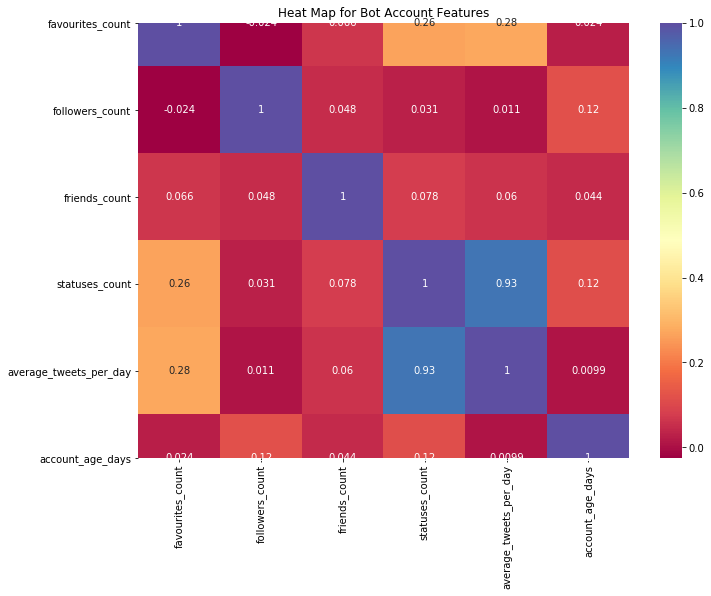

In [38]:
######################################
'''Data Anlaysis - Feature Selection'''
######################################
#Feature selection is primarily focused on removing non-informative or redundant predictors from the model.
#1 = total positive linear, 0- no correlation, -1, total negative linear correlation
#Even though the data was converted to numerical data it is still categorical inputs or nominal categorical data. 

#split data into categorical and numerical because they use different feature selection
fs_num = td_dum.iloc[:, [4,5,6,9,11,12]]

#generated a heatmap based on the correlation coeffecients for all pairs of variables.'
plt.figure(figsize=(11,8))
plt.title('Heat Map for Bot Account Features')
sns.heatmap(fs_num.corr(), cmap='Spectral', annot=True)
plt.savefig('correlation_heatmap.png')


In [39]:
td_dum.corr?

Signature: td_dum.corr(method='pearson', min_periods=1) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.

        .. versionadded:: 0.24.0

min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.

Returns
-------
DataFrame
    Correlation matrix.

See Also
--------
DataFrame.corrwith : Compute pairwise correlation with another
    DataFrame

In [40]:
#We can drop one of the features "average_tweets_per_day" or "statuses_count" because the correlation is higher than .9
td_dum.drop(columns=['average_tweets_per_day'], inplace=True)

In [41]:
#Find P-Value
#apply a multiple linear regression model in statsmodel which allows for multiple predictors 
#Wrapout categorical predictors in C() to let the forumala know the numbers represent categories and are not numerical
import statsmodels.formula.api as smf
result = smf.logit(formula = 'account_type_bot ~ C(default_profile) + C(default_profile_image) + C(description) + favourites_count + followers_count + friends_count + C(geo_enabled) + C(lang) + statuses_count + C(verified) + account_age_days', data=td_dum).fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.482483
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       account_type_bot   No. Observations:                37438
Model:                          Logit   Df Residuals:                    37426
Method:                           MLE   Df Model:                           11
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                  0.2408
Time:                        02:15:33   Log-Likelihood:                -18063.
converged:                       True   LL-Null:                       -23792.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.6712      0.058     11.488      0.

In [42]:
#Run this one more time dropping the insignificant features and the reson for this is that the p-values maychange after dropping some predictors
#In this case,it does not
import statsmodels.formula.api as smf
result = smf.logit(formula = 'account_type_bot ~ C(default_profile) + C(description) + favourites_count + friends_count + C(geo_enabled) + statuses_count + C(verified) + account_age_days', data=td_dum).fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.482568
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       account_type_bot   No. Observations:                37438
Model:                          Logit   Df Residuals:                    37429
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                  0.2407
Time:                        02:15:34   Log-Likelihood:                -18066.
converged:                       True   LL-Null:                       -23792.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.6646      0.058     11.438      0.000       0.551   

In [43]:
#Another thing we can look at is the coefficient. The coefficient shows the the odds that the account will be a bot given an increase of 1 in that feature is. If the coefficient is negative then you the odds increase that the account is a human at that percentage for each increase in 1 of the feature.

In [44]:
#Look at the P-value and drop any predictor that is greater than .05, anything lower is considered a significant predictor
td_dum.drop(columns=['default_profile_image', 'lang', 'followers_count'], inplace=True)

In [45]:
##############################################
'''Data Analysis - Dimensionality Reduction'''
##############################################
df = pd.DataFrame(td_dum)
df

,created_at,default_profile,description,favourites_count,friends_count,geo_enabled,statuses_count,verified,account_age_days,account_type_bot
0,2016-10-15 21:32:11,0,1,4,4,0,11041,0,1403,1
1,2016-11-09 05:01:30,0,1,536,880,0,252,0,1379,0
2,2017-06-17 05:34:27,0,1,3307,594,1,1001,0,1159,0
3,2016-07-21 13:32:25,1,1,8433,633,1,1324,0,1489,0
4,2012-01-15 16:32:35,0,1,88,116,1,4202,1,3138,0
...,...,...,...,...,...,...,...,...,...,...
37433,2009-08-08 13:11:15,1,1,651,1105,0,340,0,4028,0
37434,2013-01-05 21:35:37,0,1,8839,605,1,24970,1,2782,0
37435,2013-01-14 18:05:54,1,1,399,190,0,6174,1,2773,0
37436,2012-09-10 16:12:02,0,1,967,166,1,982,0,2899,0


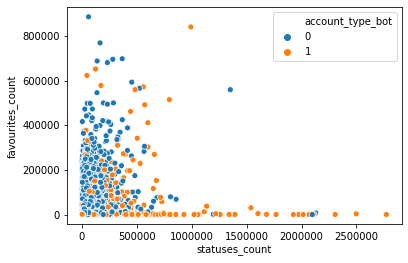

Much less correlation between status counts and favourite counts for bots. Bot accounts have higher status counts with less favourites.


In [46]:
#plot_X = td_dum.iloc[:,[1,2,3,4,5,6,7,8]]
#sns.pairplot(plot_X)

sns.scatterplot(x='statuses_count', y='favourites_count', data=td_dum, hue='account_type_bot')
plt.savefig('Favourites_statuses.png')
plt.show()
print('Much less correlation between status counts and favourite counts for bots. Bot accounts have higher status counts with less favourites.')


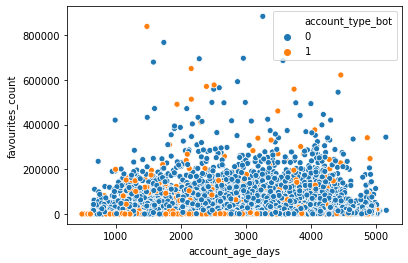

bot accounts receive much less favourites in general, regardless of account age.


In [47]:
sns.scatterplot(x='account_age_days', y='favourites_count', data=td_dum, hue='account_type_bot')
plt.savefig('accountage_favourites.png')
plt.show()
print('bot accounts receive much less favourites in general, regardless of account age.')

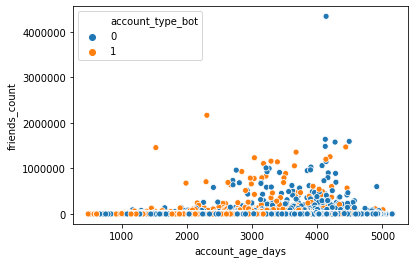

correlation is similar for both


In [48]:
sns.scatterplot(x='account_age_days', y='friends_count', data=td_dum, hue='account_type_bot')
plt.savefig('accountage_friends.png')
plt.show()
print('correlation is similar for both')

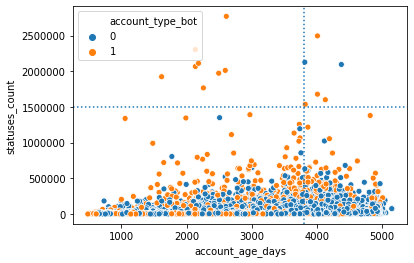

correlation is fairly similar with the exception that a small percentage of outlier bot account have over 1.5 million tweets with their account open for less than 3800 days


In [49]:
sns.scatterplot(x='account_age_days', y='statuses_count', data=td_dum, hue='account_type_bot')
plt.axvline(x=3800, linestyle='dotted')
plt.axhline(y=1500000, linestyle='dotted')
plt.savefig('accountage_statuses.png')
plt.show()
print('correlation is fairly similar with the exception that a small percentage of outlier bot account have over 1.5 million tweets with their account open for less than 3800 days')

In [50]:
###############################################
'''Data Modeling'''
###############################################

#Split Data
#Models should never be tested on the same data that they were trained

X = df.iloc[:, [1,2,3,4,5,6,7,8]]
y = df.iloc[:, 9]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=11, stratify=y)
#Stratification makes sure the the data of bots:humans in the test set is proportional

In [51]:
#Normalize your data in preparation of modeling
#Standardization = subtract the mean and divide by variance
#Min 0 and Max 1 = subtract minimum and divide by range
#Scaling improves model performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
#Logistic Regression
###################

#Build Model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs') #Logistic regression ensures probability of X is always bounded between 0 and 1, which works well for binary classification
logreg = log.fit(X_train, y_train)

y_proba_log = log.predict_proba(X_test)[:,1].round(3) #probability the account is a bot (1)
y_pred_log = log.predict(X_test)

np.column_stack((y_test, y_proba_log, y_pred_log))

array([[0.   , 0.393, 0.   ],
       [1.   , 0.548, 1.   ],
       [1.   , 0.76 , 1.   ],
       ...,
       [0.   , 0.014, 0.   ],
       [0.   , 0.382, 0.   ],
       [1.   , 1.   , 1.   ]])

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

cm_log = confusion_matrix(y_test, y_pred_log)
df_cm_log = pd.DataFrame(data=cm_log, columns=['predict: Respondent is human', 'predict: Respondent is a bot'], index=['true: human', 'true: bot'])
print(df_cm_log)
#(7+18)/(7+9+18+1)
accuracy_log = metrics.accuracy_score(y_test, y_pred_log)
misclass_log = (1 - metrics.accuracy_score(y_test, y_pred_log))
print('accuracy: ', accuracy_log, "      ", 'misclassification: ', misclass_log)
#sklearn also provides a classification report
print('Classification Report: ')
print(classification_report(y_test, y_pred_log))

             predict: Respondent is human  predict: Respondent is a bot
true: human                          5289                           965
true: bot                            1143                          1963
accuracy:  0.7747863247863248        misclassification:  0.2252136752136752
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      6254
           1       0.67      0.63      0.65      3106

    accuracy                           0.77      9360
   macro avg       0.75      0.74      0.74      9360
weighted avg       0.77      0.77      0.77      9360



In [54]:
#It doesn't often predict that the account is a bot leading to a lot of false negatives (account is human)
#We can also do this manuall to make sure

tp = cm_log[1,0]
tn = cm_log[0,0]
fp = cm_log[0,1]
fn = cm_log[1,0]

accuracy = metrics.accuracy_score(y_test, y_pred_log)
print('accuracy: ',accuracy)
#Recall = sensitivity (true positive rate)
recall = tp/(tp + fn)
print('recall for bot: ',recall)
#How many are bots of what were predicted to be bots
precision = tp/(tp + fp)
print('precision for bot: ',precision)
#How many are predicted as bots but not bots
false_alarm = fp/(fp+tn)
print('false alarm for bot: ',false_alarm)
#1- false alarm rate
specificity = tn/(tn+fp)
print('specificity for bot: ',specificity)
#Error rate
errRate = (fp + fn) / float(tp + tn + fp + fn)
print('Error Rate: ', errRate)

accuracy:  0.7747863247863248
recall for bot:  0.5
precision for bot:  0.5422201138519924
false alarm for bot:  0.15430124720179086
specificity for bot:  0.8456987527982092
Error Rate:  0.2468384074941452


Area Under Curve:  0.8316796760697751


<function matplotlib.pyplot.show(*args, **kw)>

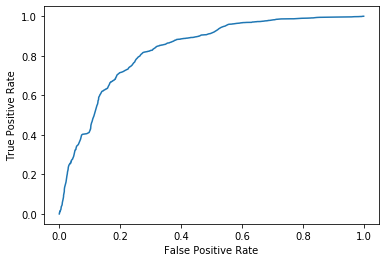

In [55]:
#plot the ROC Curve
#Shows the false positive rate vs.the true positive rate by setting different thresholds for the probability
#The closer your ROC curve to the upper left corner, the better your classification model is
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log)
np.column_stack((fpr, tpr, thresholds))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area Under Curve: ', metrics.auc(fpr, tpr))
plt.savefig('LOG_ROC.png')
plt.show

In [56]:
#K-Nearest Neighbors Model
######################################

from sklearn.neighbors import KNeighborsClassifier
#Default clostest neighbor is 5 but you can set it to any number ex) 3 knn = KNeighborsClassifier(3)
knn = KNeighborsClassifier(12)
knn.fit(X_train, y_train)
y_proba_knn = knn.predict_proba(X_test)[:,1].round(3) #probability the account is a bot (1)
y_pred_knn = knn.predict(X_test)

cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
df_cm_knn = pd.DataFrame(data=cm_knn, columns=['predict: Respondent is human', 'predict: Respondent is a bot'], index=['true: human', 'true: bot'])
print(df_cm_knn)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
misclass_knn = (1 - metrics.accuracy_score(y_test, y_pred_knn))
print('accuracy: ', accuracy_knn, "      ", 'misclassification: ', misclass_knn)
print('Classification Report: ')
print(classification_report(y_test, y_pred_knn))

             predict: Respondent is human  predict: Respondent is a bot
true: human                          5550                           704
true: bot                             943                          2163
accuracy:  0.8240384615384615        misclassification:  0.1759615384615385
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6254
           1       0.75      0.70      0.72      3106

    accuracy                           0.82      9360
   macro avg       0.80      0.79      0.80      9360
weighted avg       0.82      0.82      0.82      9360



In [57]:
#Decision Tree Model
######################################
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=10, criterion = 'entropy').fit(X_train, y_train)
y_proba_dtc = dtc.predict_proba(X_test)[:,1].round(3) #probability the account is a bot (1)
y_pred_dtc = dtc.predict(X_test)

cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
df_cm_dtc = pd.DataFrame(data=cm_dtc, columns=['predict: Respondent is human', 'predict: Respondent is a bot'], index=['true: human', 'true: bot'])
print(df_cm_dtc)
accuracy_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
misclass_dtc = (1 - metrics.accuracy_score(y_test, y_pred_dtc))
print('accuracy: ', accuracy_dtc, "      ", 'misclassification: ', misclass_dtc)
print('Classification Report: ')
print(classification_report(y_test, y_pred_dtc))

             predict: Respondent is human  predict: Respondent is a bot
true: human                          5742                           512
true: bot                             903                          2203
accuracy:  0.8488247863247863        misclassification:  0.1511752136752137
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6254
           1       0.81      0.71      0.76      3106

    accuracy                           0.85      9360
   macro avg       0.84      0.81      0.82      9360
weighted avg       0.85      0.85      0.85      9360



In [58]:
#Random Forest Classifier
######################################
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=15, random_state=0,n_estimators=10).fit(X_train, y_train)
y_proba_rfc = rfc.predict_proba(X_test)[:,1].round(3) #probability the account is a bot (1)
y_pred_rfc = rfc.predict(X_test)

cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
df_cm_rfc = pd.DataFrame(data=cm_rfc, columns=['predict: Respondent is human', 'predict: Respondent is a bot'], index=['true: human', 'true: bot'])
print(df_cm_rfc)
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
misclass_rfc = (1 - metrics.accuracy_score(y_test, y_pred_rfc))
print('accuracy: ', accuracy_rfc, "      ", 'misclassification: ', misclass_rfc)
print('Classification Report: ')
print(classification_report(y_test, y_pred_rfc))

             predict: Respondent is human  predict: Respondent is a bot
true: human                          5791                           463
true: bot                             830                          2276
accuracy:  0.8618589743589744        misclassification:  0.1381410256410256
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6254
           1       0.83      0.73      0.78      3106

    accuracy                           0.86      9360
   macro avg       0.85      0.83      0.84      9360
weighted avg       0.86      0.86      0.86      9360



Text(0, 0.5, 'Mean Error')

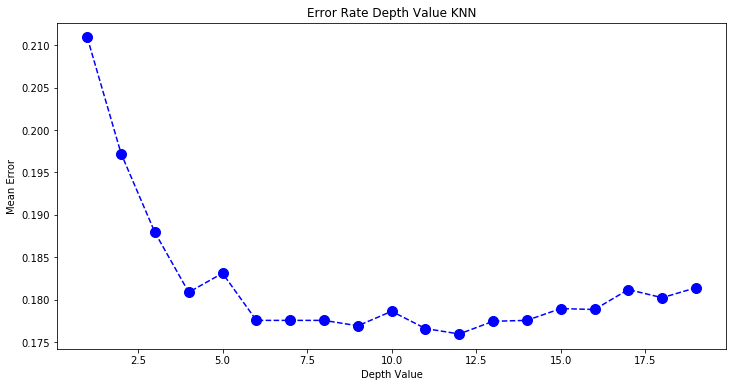

In [59]:
#################################
'''Model Selection'''
#################################

#Best Value within the model for KNN, DTC, and RFC

#K-Nearest Neighbors
error_knn = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_knn.append(np.mean(pred_i != y_test))

#Decision Tree Classifier
error_dtc = []
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    pred_i = dtc.predict(X_test)
    error_dtc.append(np.mean(pred_i != y_test))

#Random Forest Classifier
error_rfc = []
for i in range(1, 20):
    rfc = RandomForestClassifier(max_depth=i, n_estimators=10)
    rfc.fit(X_train, y_train)
    pred_i = rfc.predict(X_test)
    error_rfc.append(np.mean(pred_i != y_test))

    
    

#KNN
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_knn, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate Depth Value KNN')
plt.xlabel('Depth Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

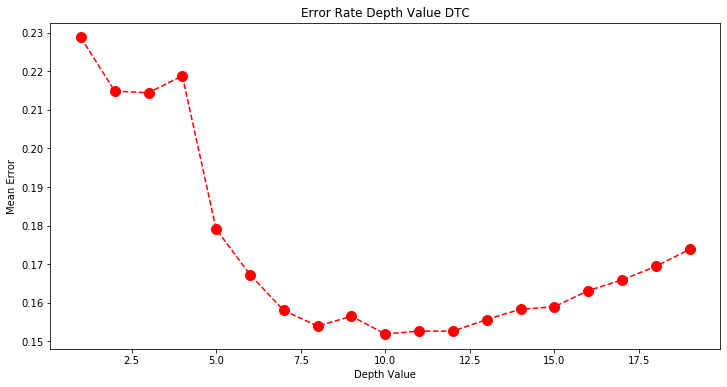

In [98]:
#DTC
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_dtc, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Depth Value DTC')
plt.xlabel('Depth Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

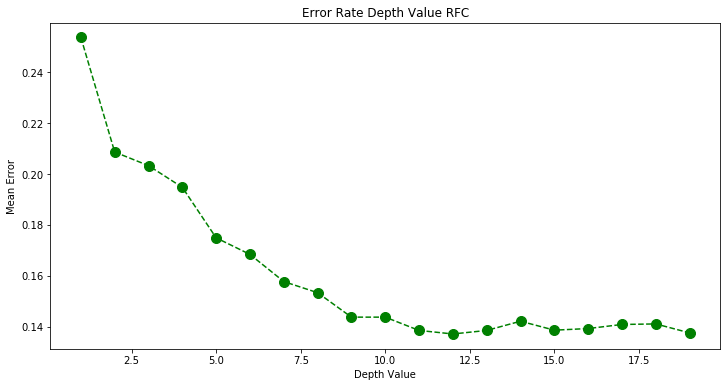

In [99]:
#RFC
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_rfc, color='green', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate Depth Value RFC')
plt.xlabel('Depth Value')
plt.ylabel('Mean Error')

In [100]:
##########################################
'''Model Selection Comparitive'''
##########################################

# Classification Metrics
print('Logistic Regression: ', 'accuracy: ', accuracy_log, "      ", 'misclassification: ', misclass_log)
print('K-Nearest Neighbors: ', 'accuracy: ', accuracy_knn, "      ", 'misclassification: ', misclass_knn)
print('Decision Tree Classifer: ', 'accuracy: ', accuracy_dtc, "      ", 'misclassification: ', misclass_dtc)
print('Random Forest Classifer: ', 'accuracy: ', accuracy_rfc, "      ", 'misclassification: ', misclass_rfc)

Logistic Regression:  accuracy:  0.7747863247863248        misclassification:  0.2252136752136752
K-Nearest Neighbors:  accuracy:  0.8240384615384615        misclassification:  0.1759615384615385
Decision Tree Classifer:  accuracy:  0.8488247863247863        misclassification:  0.1511752136752137
Random Forest Classifer:  accuracy:  0.8618589743589744        misclassification:  0.1381410256410256


LOG: 0.671243 (0.003554)
KNN: 0.846039 (0.004858)
DTC: 0.819488 (0.003517)
RFC: 0.857845 (0.004554)


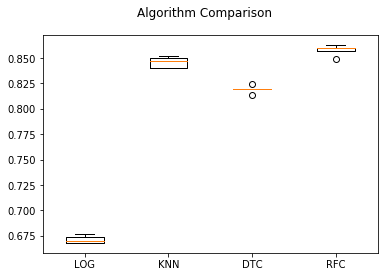

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare models
models = []
models.append(('LOG', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=10)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=11)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('Algorith_comparison.png')
plt.show()